<a href="https://colab.research.google.com/github/Stroper-Flame/TPLN-Proyecto-Final/blob/main/Proyecto_NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalamos las dependencias básicas
!pip install scikit-learn pandas matplotlib seaborn

In [ ]:
import pandas as pd
# URLs del repositorio
url_train = 'https://raw.githubusercontent.com/fmplaza/OffendES/main/split_MeOffendES/training_set.tsv'
url_test = 'https://raw.githubusercontent.com/fmplaza/OffendES/main/split_MeOffendES/test_set.tsv'

# Tuvimos un error en una versión anterior por no especificar sep='\t' porque es un archivo separado
# por tabulaciones y pensamos que era por comas.
try:
    df_train = pd.read_csv(url_train, sep='\t')
    df_test = pd.read_csv(url_test, sep='\t')
    print(f"Datos cargados. Train: {df_train.shape}, Test: {df_test.shape}")
except Exception as e:
    print("Error cargando los datos:", e)

Datos cargados. Train: (16710, 6), Test: (13606, 6)


In [ ]:
import re

# Definimos la función de limpieza
def limpieza_basica(text):
    text = str(text).lower()
    # Mantenemos solo letras y espacios.
    text = re.sub(r'[^a-záéíóúñ\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Aplicamos la limpieza
df_train['comment_clean'] = df_train['comment'].apply(limpieza_basica)
df_test['comment_clean'] = df_test['comment'].apply(limpieza_basica)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizamos el texto
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(df_train['comment_clean'])
X_test = vectorizer.transform(df_test['comment_clean'])

# Mapeo de etiquetas
y_train = df_train['label'].map({'NO': 0, 'NOE': 0, 'OFP': 1, 'OFG': 1})
y_test = df_test['label'].map({'NO': 0, 'NOE': 0, 'OFP': 1, 'OFG': 1})

In [ ]:
from sklearn.svm import LinearSVC
svm_v1 = LinearSVC(random_state=42, max_iter=2000)
svm_v1.fit(X_train, y_train)
print("Fin del entrenamiento")

Fin del entrenamiento


Resultados
              precision    recall  f1-score   support

 No Ofensivo       0.89      0.98      0.93     11055
    Ofensivo       0.81      0.45      0.58      2551

    accuracy                           0.88     13606
   macro avg       0.85      0.71      0.75     13606
weighted avg       0.87      0.88      0.86     13606



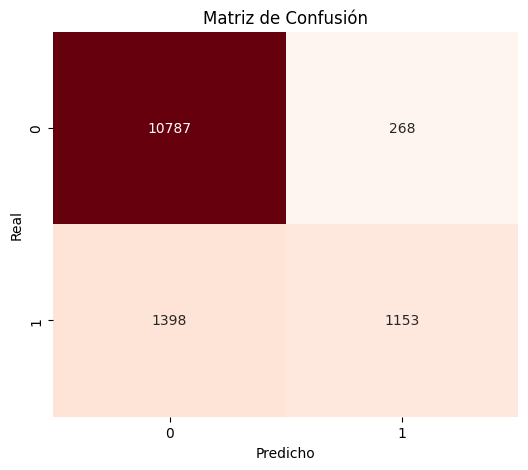

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_v1 = svm_v1.predict(X_test)

print("Resultados")
print(classification_report(y_test, y_pred_v1, target_names=['No Ofensivo', 'Ofensivo']))

# Graficamos la matriz para ponerla en el reporte
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_v1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

# ANÁLISIS PARA LA BITÁCORA:
# Observamos que el Recall de 'Ofensivo' es bajo (probablemente < 0.50).
# Esto confirma que eliminar emojis y no balancear las clases fue un error.